# Regression

##Importing Libraries and Datasets.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded =files.upload()

Saving Housing_data.csv to Housing_data (1).csv


##Reading the Dataset

In [ ]:
DataSet = pd.read_csv('Housing_data.csv') 

#checking the size of our dataset
print("size of dataset is",len(DataSet))
#To see random rows of the dataset we will be working on.
DataSet.sample(n=10)



size of dataset is 17210


,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9879,2386000240,9/29/2014,850000.0,5,3870,65556,2.0,0,3,10,3870,0,1994,0,98053,47.6403,-121.992,4290,67019
15550,6821102170,5/7/2014,794154.0,4,2210,8556,1.0,0,4,8,1210,1000,1954,0,98199,47.6498,-122.396,2190,7975
12686,5561000420,4/8/2015,490000.0,4,3390,39356,1.0,0,4,8,1640,1750,1964,0,98027,47.4610,-121.992,2160,38061
5117,1425059193,10/9/2014,817500.0,5,3600,9312,2.0,0,3,10,2680,920,2005,0,98052,47.6582,-122.122,3420,9860
269,6414100671,9/9/2014,425000.0,3,2500,6840,1.0,0,3,8,1300,1200,1957,0,98125,47.7222,-122.320,1580,8691
14727,3667500015,9/25/2014,770000.0,4,3680,2242,2.5,0,3,9,2670,1010,1930,2007,98112,47.6192,-122.307,1350,1288
14411,1545806960,4/22/2015,295000.0,3,1060,8100,2.0,0,4,7,1060,0,1983,0,98038,47.3617,-122.047,1410,8100
16956,9528101061,8/25/2014,580000.0,4,1460,951,3.0,0,3,8,1460,0,2008,0,98115,47.6821,-122.326,1430,1282
1451,7365600070,6/24/2014,762500.0,4,2610,8760,1.0,0,4,8,1760,850,1978,0,98040,47.5875,-122.229,2550,10376
3860,629500170,3/26/2015,679950.0,4,2850,5664,2.0,0,3,9,2850,0,2001,0,98075,47.5835,-121.996,2850,5475


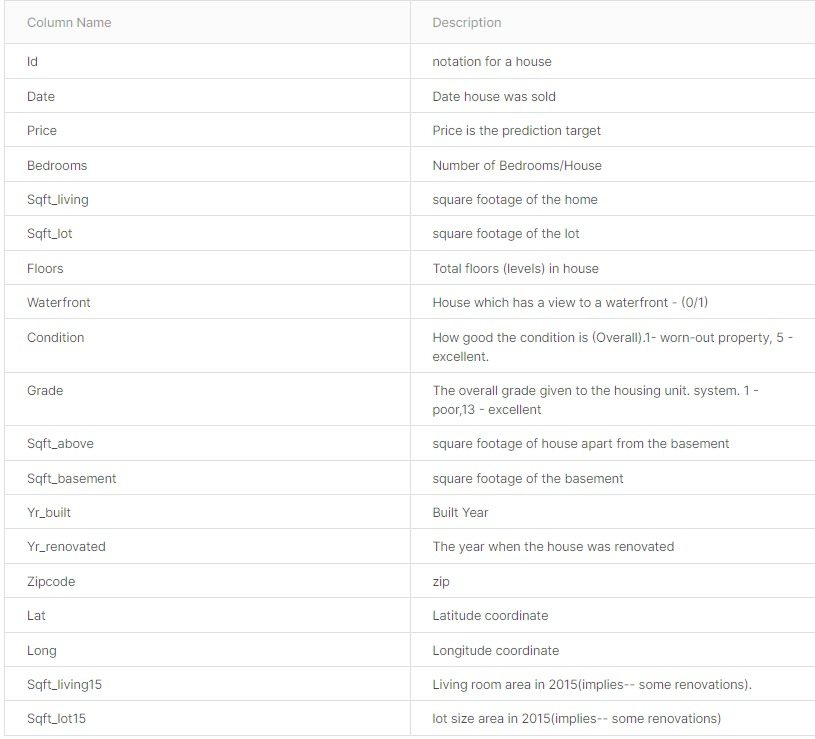

In [ ]:
DataSet.describe()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.721000e+04,1.721000e+04,17210.000000,17210.000000,1.721000e+04,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000
mean,4.584539e+09,5.391069e+05,3.373213,2080.172051,1.513545e+04,1.498605,0.008077,3.409587,7.661941,1788.108077,292.063974,1971.285880,84.305985,98077.903661,47.559731,-122.213991,1987.480244,12785.612028
std,2.874471e+09,3.674218e+05,0.927616,917.995097,4.260361e+04,0.542192,0.089509,0.646909,1.170044,824.994890,443.397892,29.378191,401.454725,53.554500,0.138973,0.140486,684.866281,27294.470122
min,1.000102e+06,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125570e+09,3.200000e+05,3.000000,1420.000000,5.034000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.468925,-122.328000,1490.000000,5100.000000
50%,3.904980e+09,4.500000e+05,3.000000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.308600e+09,6.400000e+05,4.000000,2550.000000,1.070075e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678175,-122.125000,2368.250000,10092.000000
max,9.900000e+09,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
indepvar=DataSet.iloc[:,DataSet.columns!='price'].values #Independent Variables 
print(indepvar)


[[7129300520 '10/13/2014' 3 ... -122.257 1340 5650]
 [6414100192 '12/9/2014' 3 ... -122.319 1690 7639]
 [5631500400 '2/25/2015' 2 ... -122.233 2720 8062]
 ...
 [1523300141 '6/23/2014' 2 ... -122.299 1020 2007]
 [291310100 '1/16/2015' 3 ... -122.069 1410 1287]
 [1523300157 '10/15/2014' 2 ... -122.299 1020 1357]]


In [ ]:
depvar=DataSet.iloc[:,2].values #dependent variable
print(depvar)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


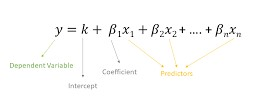

##Information about our dataset

In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17210 non-null  int64  
 1   date           17210 non-null  object 
 2   price          17210 non-null  float64
 3   bedrooms       17210 non-null  int64  
 4   sqft_living    17210 non-null  int64  
 5   sqft_lot       17210 non-null  int64  
 6   floors         17210 non-null  float64
 7   waterfront     17210 non-null  int64  
 8   condition      17210 non-null  int64  
 9   grade          17210 non-null  int64  
 10  sqft_above     17210 non-null  int64  
 11  sqft_basement  17210 non-null  int64  
 12  yr_built       17210 non-null  int64  
 13  yr_renovated   17210 non-null  int64  
 14  zipcode        17210 non-null  int64  
 15  lat            17210 non-null  float64
 16  long           17210 non-null  float64
 17  sqft_living15  17210 non-null  int64  
 18  sqft_l

We see that there are no missing values in this DataSet

##Building the model

In [ ]:
X= DataSet.drop(['bedrooms','id','zipcode','lat','long','price','date'], axis=1)
print(X)
print(X.columns)

       sqft_living  sqft_lot  floors  ...  yr_renovated  sqft_living15  sqft_lot15
0             1180      5650     1.0  ...             0           1340        5650
1             2570      7242     2.0  ...          1991           1690        7639
2              770     10000     1.0  ...             0           2720        8062
3             1960      5000     1.0  ...             0           1360        5000
4             1680      8080     1.0  ...             0           1800        7503
...            ...       ...     ...  ...           ...            ...         ...
17205         1310      1294     2.0  ...             0           1330        1265
17206         1530      1131     3.0  ...             0           1530        1509
17207         1020      1350     2.0  ...             0           1020        2007
17208         1600      2388     2.0  ...             0           1410        1287
17209         1020      1076     2.0  ...             0           1020        1357

[17

In [ ]:
Y=DataSet['price']
print(Y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
17205    475000.0
17206    360000.0
17207    402101.0
17208    400000.0
17209    325000.0
Name: price, Length: 17210, dtype: float64


###Categorical encoding 

In [ ]:
#Add the categorical encoding from data cleaning 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [])], remainder='passthrough')
print(np.array(ct.fit_transform(X))) 

##Splitting the Dataset into training data and testing data.

This method is followed when we dont have seperate training and testing data. So we will be dividing the data into two data using train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)




In [ ]:
print(x_train)

       sqft_living  sqft_lot  floors  ...  yr_renovated  sqft_living15  sqft_lot15
13754         2100      7355     1.0  ...             0           1750        7200
11564         3800     15500     1.0  ...             0           2000       13980
1500          1250      8400     1.0  ...             0           1560        8400
7382           970      5600     1.0  ...             0           1020        5600
11558         3290     11446     2.0  ...             0           2050       11933
...            ...       ...     ...  ...           ...            ...         ...
14696         1060      9241     1.0  ...             0           1900        6484
1099          2120      9307     2.0  ...             0           2290       11524
11798         2070     10800     2.0  ...             0           1880       10800
6637          1270     10790     1.0  ...             0           1270       10790
2575          2550      5300     2.0  ...          2013           1590        4505

[13

In [ ]:
print(y_train)

13754    39900.0
11564    38000.0
1500     33000.0
7382     21700.0
11558    52000.0
          ...   
14696    30100.0
1099     71900.0
11798    40000.0
6637     40300.0
2575     85500.0
Name: price, Length: 13768, dtype: float64


In [ ]:
print(x_test)

       sqft_living  sqft_lot  floors  ...  yr_renovated  sqft_living15  sqft_lot15
14418         3830    219106     2.0  ...          1999           2440      219106
9806          1120      2000     1.5  ...             0           1500        4000
13503         2110     10005     1.0  ...             0           1360        9827
519           3930     55867     1.0  ...             0           2730       26324
3886           910      4500     1.5  ...             0           1270        3500
...            ...       ...     ...  ...           ...            ...         ...
2176          1730     10368     1.0  ...             0           1730        7728
10494         2160      7500     2.0  ...             0           1550        3839
13900         2110     16200     1.0  ...             0           2370       16000
7092          1830     27468     1.0  ...             0           1860       10180
5523          2000      7205     2.0  ...             0           2180        7611

[34

In [ ]:
print(y_test)

14418     86500.0
9806      52400.0
13503     47530.0
519      307000.0
3886      35000.0
           ...   
2176      26800.0
10494    101000.0
13900     49000.0
7092      39800.0
5523      32500.0
Name: price, Length: 3442, dtype: float64


##Training the model on training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Instead of liner regressor from sklearn we can make the regressor from scratch using the mathematical concepts

##Predicting the Test set results

Predicts the the value of dependable variables for the values in X_test. 

In [ ]:
y_pred = regressor.predict(x_test)

##Checking the accuracy

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
print("The RMSE of the model is ",math.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE of the model is  21157.278709686656


##Implementting polynomial regression on the same data

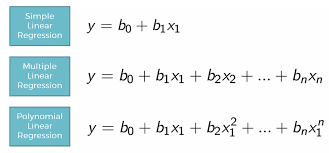

###Training the model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Predicting the test set results

In [ ]:
X_poly_test = poly_reg.fit_transform(x_test)
y_poly_pred=regressor.predict(poly_reg.fit_transform(x_test))

###Checking the accuracy

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
print("The RMSE of the model is ",math.sqrt(mean_squared_error(y_test, y_poly_pred)))

The RMSE of the model is  18696.87317370545


##Visualising Linear Regression

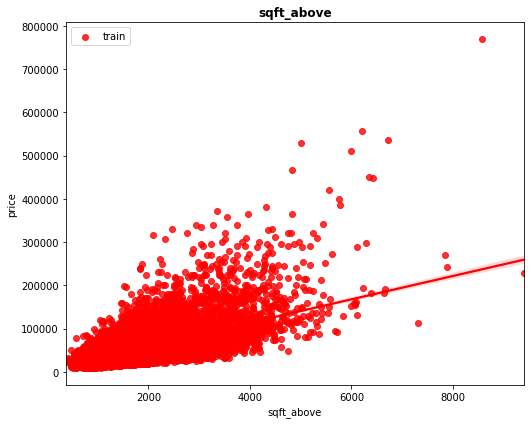

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
sns.regplot(x='sqft_above', y='price', data=DataSet, color='red', label='train')
ax1.set_title('sqft_above', fontweight='bold')
ax1.legend()
plt.tight_layout()
plt.show()

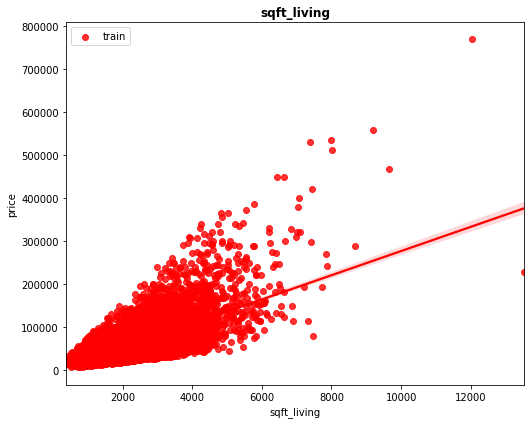

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
sns.regplot(x='sqft_living', y='price', data=DataSet, color='red', label='train')
ax1.set_title('sqft_living', fontweight='bold')
ax1.legend()
plt.tight_layout()
plt.show()

##Visualising polynomial regression 

<Figure size 1008x432 with 0 Axes>

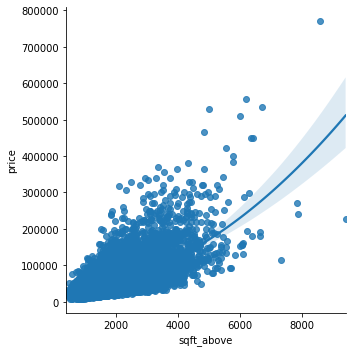

In [ ]:
fig = plt.figure(figsize=(14, 6))
sns.lmplot(x="sqft_above", y="price", data=DataSet,order=2);
plt.tight_layout()
plt.show()

<Figure size 1008x432 with 0 Axes>

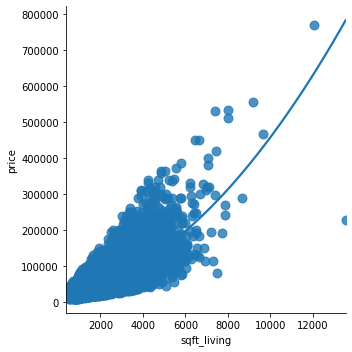

In [ ]:

fig = plt.figure(figsize=(14, 6))

sns.lmplot(x="sqft_living", y="price", data=DataSet,
           order=2, ci=None, scatter_kws={"s": 80});
plt.tight_layout()
plt.show()